# Fake News Classifier 

## Libraries

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.naive_bayes import MultinomialNB

In [6]:
from sklearn.metrics import plot_confusion_matrix , confusion_matrix , accuracy_score

In [7]:
import warnings
warnings.filterwarnings("ignore")

## Dataset

`DataSet link` : https://www.kaggle.com/c/fake-news/data

In [8]:
data = pd.read_csv("fake-news.csv")
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


`label`: a label that marks the article as potentially unreliable
- 1: unreliable
- 0: reliable

In [9]:
data.shape

(20800, 5)

In [10]:
data = data.dropna()

In [11]:
data.shape

(18285, 5)

In [12]:
data = data.head(10000)

In [13]:
data.reset_index(inplace=True)

In [14]:
ps = PorterStemmer()
corpus = []

for i in range(0 ,len(data)) :
    
    # replace every character except b/w atoz and AtoZ by ' '
    review = re.sub('[^a-zA-Z]' ," ",data['title'][i])
    
    # convert to lowercase
    review = review.lower()
    
    # split words
    review = review.split()
    
    # remove stop words
    review = [ps.stem(word)   for word in review   if not word in stopwords.words('english')]
    
    # again join the words
    review = ' '.join(review)
    
    corpus.append(review)

# Creating bag of words model

In [15]:
# from all the words take most occuring 5000 words
# ngram_range , means take combination of 1 or 2 or 3 words
cv = CountVectorizer( max_features=5000 ,ngram_range=(1,3))

In [16]:
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
X.shape

(10000, 5000)

In [18]:
y = data['label']

In [19]:
y.shape

(10000,)

In [20]:
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Naive Bayes Classifier

In [21]:
classifier = MultinomialNB(alpha=0.1)

In [22]:
previous_score = 0

#  Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing)
for alpha in np.arange(0,1,0.1):
    
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train ,y_train)
    
    y_pred = sub_classifier.predict(X_test)
    score   = accuracy_score(y_test ,y_pred)
    
    if score>previous_score :
        classifier = sub_classifier
        previous_score = score
    
    print(f"Alpha : {alpha :.2f} , Score : {score :.4f} \n")

Alpha : 0.00 , Score : 0.8737 

Alpha : 0.10 , Score : 0.8967 

Alpha : 0.20 , Score : 0.8973 

Alpha : 0.30 , Score : 0.8987 

Alpha : 0.40 , Score : 0.9010 

Alpha : 0.50 , Score : 0.9013 

Alpha : 0.60 , Score : 0.9007 

Alpha : 0.70 , Score : 0.9000 

Alpha : 0.80 , Score : 0.9007 

Alpha : 0.90 , Score : 0.9010 



In [23]:
y_pred = classifier.predict(X_test)

## Accuracy Check

In [24]:
score = accuracy_score(y_test ,y_pred)
print(f"Accuaracy : {score*100 : .2f}%")

Accuaracy :  90.13%


In [25]:
confusion_matrix(y_test ,y_pred)

array([[1516,  154],
       [ 142, 1188]], dtype=int64)

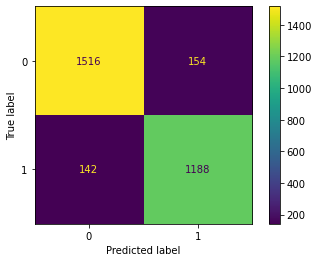

In [26]:
plot_confusion_matrix(
                        classifier ,
                        X_test ,
                        y_test ,
                     )